# Brazilian E-Commerce Dataset by Olist

# 巴西电商olist的数据集分析

这是巴西Olist电子商务的数据集，包含了2016年到2018年在巴西多个市场中进行的10万份订单。

同时，这是一份真实的商业数据，已经被匿名化。

之后他们通过电子邮件的调查形式，收集顾客对于客户满意度的评分,获得了order_review数据集。

官方网站 https://olist.com


现在将用以下形式对这个数据集进行分析：

1、customer 顾客

2、product 产品

3、payment 支付方式

4、order 订单

5、seller 卖家

6、geolocation 地理位置

7、item 订单产品明细

8、order_review 反馈

9、product_translation 产品的英文与葡萄牙语的翻译对照表

数据集中的货币单位为巴西雷亚尔 Brazilian Reais (BRL)

1 BRL = 0.26 USD
一个巴西雷亚尔约等于0.26美金

维基百科页面——巴西雷亚尔 https://en.wikipedia.org/wiki/Brazilian_real

## 0. 加载数据集和分析包

In [1]:
#load packages 加载分析包
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read all csv files 加载数据集
product_translation = pd.read_csv("product_category_name_translation.csv")

payment = pd.read_csv("olist_order_payments_dataset.csv")

customer = pd.read_csv("olist_customers_dataset.csv")

seller = pd.read_csv("olist_sellers_dataset.csv")

product = pd.read_csv("olist_products_dataset.csv")

order = pd.read_csv("olist_orders_dataset.csv")

order_review = pd.read_csv("olist_order_reviews_dataset.csv")

item = pd.read_csv("olist_order_items_dataset.csv")

geolocation = pd.read_csv("olist_geolocation_dataset.csv")

## 1.Clean Data 清理数据

In [3]:
def hist(dataset,feature):
    dataset[feature].plot(kind = "hist", color = "red", alpha = 0.6)
    return None

In [4]:
#write a function for visualization 制作用于可视化的函数
def plot(dataset,feature,plot_kind):
    
    dataset[feature].value_counts().plot(kind = plot_kind,
                                        color = "red",
                                        alpha = 0.6)
    
    return None

#### customer 数据集

{customer_id} - key to the orders dataset. Each order has a unique customer_id.

{customer_unique_id} - unique identifier of a customer.

{customer_zip_code_prefix} - first five digits of customer zip code

{customer_city} - customer city name

{customer_state}  - customer state


In [5]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
customer.duplicated().sum()

0

In [8]:
customer.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

一共99441条数据，没有重复值，也没有缺失值

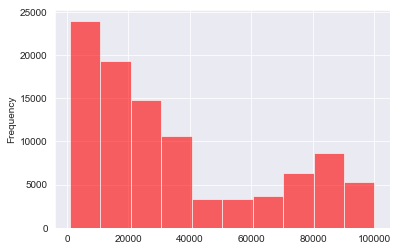

In [9]:
hist(customer,"customer_zip_code_prefix")

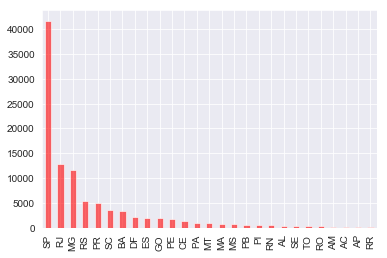

In [10]:
plot(customer,"customer_state","bar")

In [11]:
customer_copy = customer.copy()

#### order 数据集

{order_id} - unique identifier of the order.

{customer_id} - key to the customer dataset. Each order has a unique customer_id.

{order_status} - Reference to the order status (delivered, shipped, etc).

{order_purchase_timestamp} - Shows the purchase timestamp.

{order_approved_at} - Shows the payment approval timestamp.

{order_delivered_carrier_date} - Shows the order posting timestamp. When it was handled to the logistic partner.

{order_delivered_customer_date} - Shows the actual order delivery date to the customer.

{order_estimated_delivery_date} - Shows the estimated delivery date that was informed to customer at the purchase moment.

The estimated delivery date was roughly calculated by using this:

Seller shipping days - The amount of time a seller needs to ship its orders.

Seller SKU availability days - The amount of time a seller needs to ship a specific sku.

Transit Time - The amount of time informed by the logistic operator to deliver that order from origin to destination.

The same logic applies for freight value:

Package Weight

Package dimensions

Origin

Destination

Product Value - For insurance purposes

Delivered early orders might be explained by sellers that shipped the order earlier than expected and also logistic operators that delivered the order before the deadline. Delivered late are mostly explained by the opposite.

In [12]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
print("The number of duplicated row in the dataset is :",order.duplicated().sum())

The number of duplicated row in the dataset is : 0


In [15]:
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

没有重复值，但是在order_approved_at和order_delivered_carrier_date order_delivered_customer_date等列数据条目缺少

In [16]:
print("The unique number of this order_id column in the dataset is :",order.order_id.nunique())

The unique number of this order_id column in the dataset is : 99441


In [17]:
print("The unique number of this customer_id column in the dataset is :",order.customer_id.nunique())

The unique number of this customer_id column in the dataset is : 99441


In [18]:
order.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [19]:
status_perc = order.order_status.value_counts()/order.order_status.value_counts().sum()
status_perc

delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64

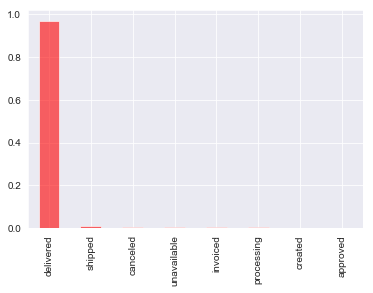

In [20]:
status_perc.plot(kind = "bar",color = "red",alpha = 0.6)

已经显示delivered的订单是没有问题的，现在更关注那些没有成交的订单，所以将状态显示为delivered去掉，查看剩下的部分

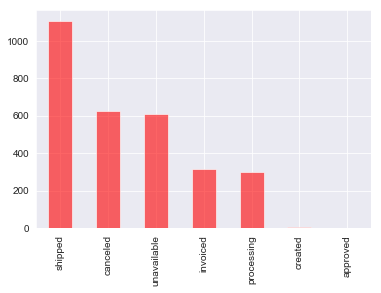

In [21]:
order.query('order_status != "delivered"')["order_status"].value_counts().plot(kind = "bar", 
                                                                               color = "red",
                                                                               alpha = 0.6)

将正常成交且顺利运送到的订单去除掉之后，剩下的订单中，正在派送 shipped 还是数量最多的，也有canceled 处于取消状态、和 unavailable状态异常的、invoiced、processing 正在处理中的、created 刚刚创建的、approved 已确认的

In [22]:
canceled_order = order.query("order_status == 'canceled'")
canceled_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00


取消的订单

In [23]:
unavailable_order = order.query('order_status == "unavailable"')
unavailable_order.count()

order_id                         609
customer_id                      609
order_status                     609
order_purchase_timestamp         609
order_approved_at                609
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date    609
dtype: int64

In [24]:
unavailable_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00


订单状态异常的

In [25]:
invoiced_order = order.query('order_status == "invoiced"')
invoiced_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaN,NaN,2017-08-28 00:00:00
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaN,NaN,2017-06-06 00:00:00
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaN,NaN,2017-12-20 00:00:00


In [26]:
processing_order = order.query("order_status == 'processing'")
processing_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaN,NaN,2017-12-20 00:00:00
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaN,NaN,2017-12-12 00:00:00
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaN,NaN,2017-04-04 00:00:00


In [27]:
created_order = order.query('order_status == "created"')
created_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00


刚刚创建的订单，还没有确认的订单

In [28]:
approved_order = order.query('order_status == "approved"')
approved_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaN,NaN,2017-03-01 00:00:00
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaN,NaN,2017-05-22 00:00:00


刚刚确认订单，还没有出库和安排投递的

In [29]:
order.order_approved_at = pd.to_datetime(order.order_approved_at)
order["year"] = order.order_approved_at.dt.year

In [30]:
#更改year列的数据类型
order["order_date"] = pd.to_datetime(order.order_approved_at,format= "%Y%m%d")

In [31]:
order.order_approved_at.describe()

count                   99281
unique                  90733
top       2018-02-27 04:31:10
freq                        9
first     2016-09-15 12:16:38
last      2018-09-03 17:40:06
Name: order_approved_at, dtype: object

最早的订单日期是，2016年9月15日；

最晚的订单日期是，2018年9月3日，

由此看来，2016年与2018年的数据都不是自然年从1月1日到12月31日的数据。


In [32]:
order_copy = order.copy()

In [33]:
order_delivered = order_copy.query("order_status == 'delivered'")
order_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,order_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017.0,2017-10-02 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018.0,2018-07-26 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018.0,2018-08-08 08:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017.0,2017-11-18 19:45:59
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018.0,2018-02-13 22:20:29


In [34]:
order_delivered.to_csv("order_delivered.csv",index = False)

#### product_translation 数据集

In [35]:
product_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [36]:
product_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
product_category_name            71 non-null object
product_category_name_english    71 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


#### payment 数据集

{order_id} - unique identifier of an order.

{payment_sequential}  - a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.

{payment_type} - method of payment chosen by the customer.

{payment_installments} - number of installments chosen by the customer.

{payment_value} - transaction value.

In [37]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Text(0.5, 1.0, 'Different Payment')

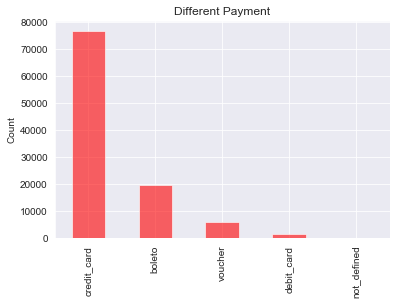

In [38]:
plot(payment,"payment_type","bar")

plt.ylabel("Count")
plt.title("Different Payment")

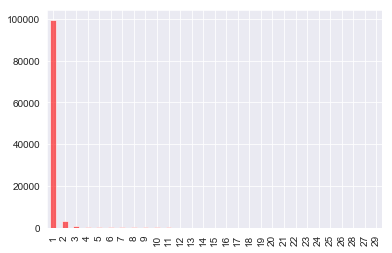

In [39]:
plot(payment,"payment_sequential","bar")

Text(0.5, 1.0, 'Installments In Payment')

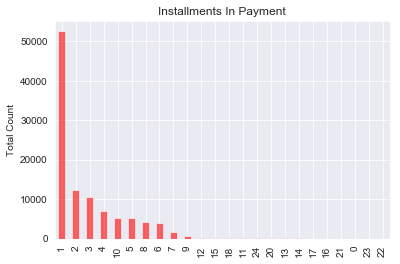

In [40]:
plot(payment,"payment_installments","bar")
plt.ylabel("Total Count")
plt.title("Installments In Payment")

Text(0, 0.5, 'Total Order Value(million dollar)')

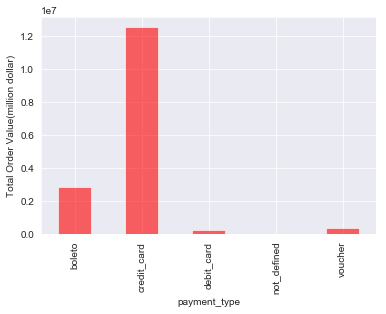

In [41]:
payment.groupby("payment_type")["payment_value"].sum().plot(kind = "bar", 
                                                            color = "red",alpha = 0.6)
plt.ylabel("Total Order Value(million dollar)")

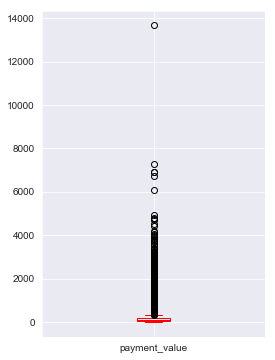

In [42]:
payment.payment_value.plot(kind = "box",color = "red",
                           figsize = (4,6))

(0, 500)

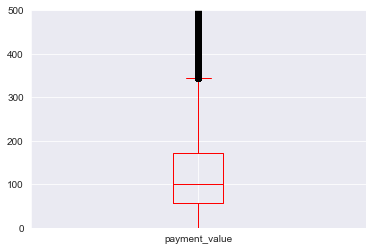

In [43]:
payment.payment_value.plot(kind = "box",
                   color = "red")
plt.ylim([0,500])

In [44]:
payment.payment_value.describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [45]:
payment[payment.payment_value == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


这9个订单都是订单金额为0的，细查发现是使用了voucher代金券和三个not_defined，所以实收金额为0。

In [46]:
payment[payment.payment_value == 13664.080000]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08


有一个非常大的订单金额，在平均金额为154.100380的情况下，达到单笔13664.08；

详情来看，这笔确实是存在的，使用了信用卡付款，并且一次付清。

#### item 数据集

{order_id} - order unique identifier

{order_item_id} - sequential number identifying number of items included in the same order.

{product_id} - product unique identifier

{seller_id} - seller unique identifier

{shipping_limit_date} - Shows the seller shipping limit date for handling the order over to the logistic partner.

{price item} -  price

{freight_value} -  item freight value item (if an order has more than one item the freight value is splitted between items)

Dimensões do pacote
Peso do pacote
Origem (nossos pacotes tem múltiplas origens)
Destino
Valor do seguro (0,7% do valor do produto = valor do produto * 0.007 )
Se você subtrair do frete 0,7% do valor do produto, deverá eliminar boa parte da correlação entre as duas variáveis. deverão sobrar somente relações do tipo: 
produto mais caro -> pacote maior -> frete mais caro


运费的计算考虑了以下变量：

封装尺寸
包裹的重量
来源（我们的数据有多个起源）
目的地
保险价值（0.7 %的产品价值=产品价值×0.007）
如果你的货物价值减去的0.7%的好产品，希望消除这两个变量之间的关系的一部分。

只有类型的关系应是：
最大最贵的产品→包装→最昂贵的运费


In [47]:
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [48]:
item.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
35601,509e23091b0dc6edfc5fffc94dc3dd0a,1,60349023b5385947aa3a395689868518,77530e9772f57a62c906e1c21538ab82,2017-10-26 19:49:09,49.00,15.10
48301,6dcf745ce57950a1212195d3559b1a85,1,c69a909c359c635a647fb23aff17b362,bc47d5d1490df2b36add65d733eafaba,2018-03-14 02:30:44,90.00,14.72
110334,faaf6a860e3ad876765787c9e1a93464,1,56a59e73563d9b8d536af8b0dc9e0995,e24fc9fcd865784fb25705606fe3dfe7,2017-04-11 16:10:10,156.00,11.70
88507,c901aee1a796480fc91d75a1214eb170,1,b83738ac1903f7c8f0ed378cb085909c,c003204e1ab016dfa150abc119207b24,2018-04-06 17:49:02,129.90,34.77
19242,2c398232e6fe6bb3416c2cd54a5b0b28,1,920840f7899b13c467d223950c89e9e9,7a67c85e85bb2ce8582c35f2203ad736,2017-05-02 08:25:54,20.99,12.93


for example:

for order_id 00143d0f86d6fbd9f9b38ab440ac16f5, there are 3 same products, so

The total order_item value is: 21.33 * 3 = 63.99

The total freight value is: 15.10 * 3 = 45.30

The total order value (product + freight)  is: 45.30 + 63.99 = 109.29

举个例子：

对于订单 00143d0f86d6fbd9f9b38ab440ac16f5，一共有3个产品，从product_id来看，是同一个产品，所以

订单中产品的总金额为 21.33 * 3 = 63.99

订单中运费的总金额为 15.10 * 3 = 45.30

总订单金额为（产品总金额+总运费） = 45.30 + 63.99 = 109.29

In [49]:
item[item.order_id == "00143d0f86d6fbd9f9b38ab440ac16f5"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [50]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [51]:
item.duplicated().sum()

0

数据集没有缺失值，也没有重复值，开始探索性分析

In [52]:
item.order_id.nunique()

98666

order_id列的数据数量98666小于112650个，

所以存在同一个订单中，购买不同商品，但是分开来算的情况

In [53]:
item.order_item_id.value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

In [54]:
item.product_id.nunique()

32951

In [55]:
item.seller_id.nunique()

3095

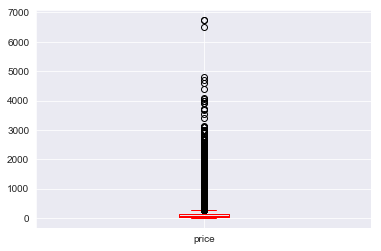

In [56]:
item.price.plot(kind = "box", color = "red")                        

In [57]:
item.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

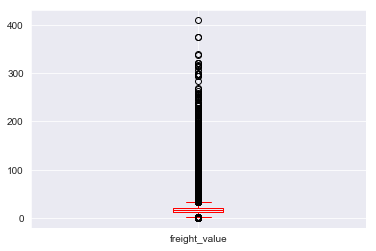

In [58]:
item.freight_value.plot(kind = "box", color ="red")

In [59]:
item.freight_value.describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

#### seller 数据集

{seller_id} - seller unique identifier

{seller_zip_code_prefix} - first 5 digits of seller zip code

{seller_city} - seller city name

{seller_state} - seller state

In [60]:
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [61]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [62]:
seller.seller_zip_code_prefix.nunique()

2246

In [63]:
seller.seller_city.nunique()

611

In [64]:
seller.seller_state.nunique()

23

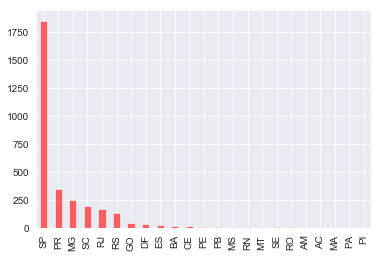

In [65]:
seller.seller_state.value_counts().plot(kind = "bar",alpha = 0.6, color = "red")

In [66]:
seller_perc = seller.seller_state.value_counts()/seller.seller_state.value_counts().sum()
seller_perc

SP    0.597415
PR    0.112763
MG    0.078837
SC    0.061389
RJ    0.055250
RS    0.041680
GO    0.012924
DF    0.009693
ES    0.007431
BA    0.006139
CE    0.004200
PE    0.002908
PB    0.001939
MS    0.001616
RN    0.001616
MT    0.001292
SE    0.000646
RO    0.000646
AM    0.000323
AC    0.000323
MA    0.000323
PA    0.000323
PI    0.000323
Name: seller_state, dtype: float64

#### product 数据集

{product_id} - unique product identifier

{product_category_name} - root category of product, in Portuguese.

{product_name_lenght} - number of characters extracted from the product name.

{product_description_lenght} - number of characters extracted from the product description.

{product_photos_qty} - number of product published photos

{product_weight_g} - product weight measured in grams.

{product_length_cm} - product length measured in centimeters.

{product_height_cm} - product height measured in centimeters.

{product_width_cm} - product width measured in centimeters.

In [67]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [68]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [69]:
product.product_id.nunique()

32951

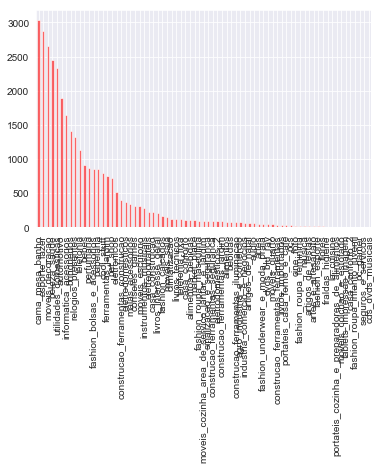

In [70]:
plot(product,"product_category_name","bar")

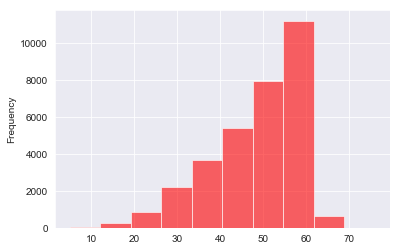

In [71]:
hist(product,"product_name_lenght")

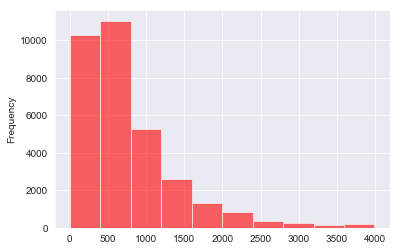

In [72]:
hist(product,"product_description_lenght")

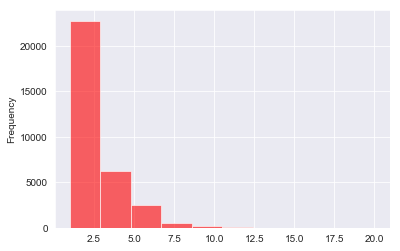

In [73]:
hist(product,"product_photos_qty")

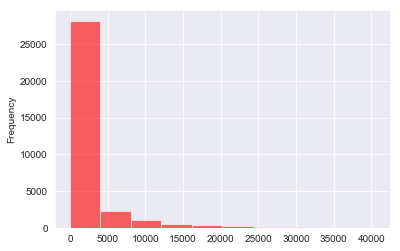

In [74]:
hist(product,"product_weight_g")

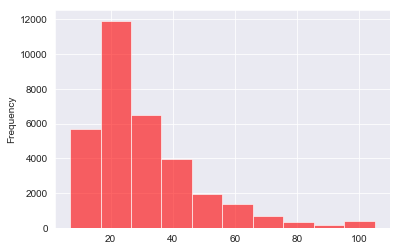

In [75]:
hist(product,"product_length_cm")

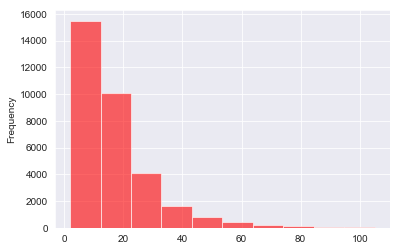

In [76]:
hist(product,"product_height_cm")

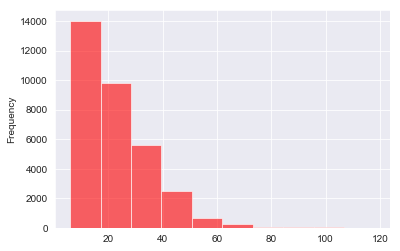

In [77]:
hist(product,"product_width_cm")

####  order_review 数据集

{review_id} - unique review identifier

{order_id} - unique order identifier

{review_score} - Note ranging from 1 to 5 given by the customer on a satisfaction survey.

{review_comment_title} - Comment title from the review left by the customer, in Portuguese.

{review_comment_message} - Comment message from the review left by the customer, in Portuguese.

{review_creation_date} - Shows the date in which the satisfaction survey was sent to the customer.

{review_answer_timestamp} - Shows satisfaction survey answer timestamp.

In [78]:
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [79]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


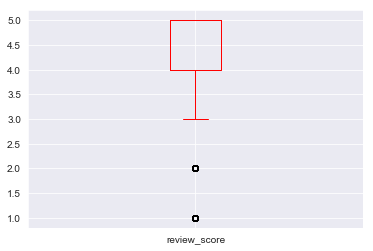

In [80]:
order_review.review_score.plot(kind = "box", color = "red")

In [81]:
order_review.query("review_score == '1'").count()

review_id                  11858
order_id                   11858
review_score               11858
review_comment_title        1957
review_comment_message      9179
review_creation_date       11858
review_answer_timestamp    11858
dtype: int64

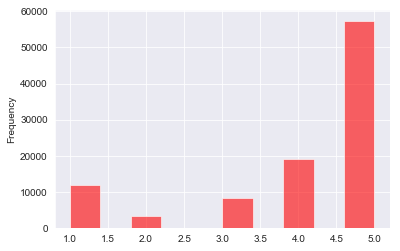

In [82]:
hist(order_review,"review_score")

#### geolocation 数据集

「geolocation_zip_code_prefix」- first 5 digits of zip code

「geolocation_lat」 - latitude

「geolocation_lng」 - longitude

「geolocation_city」 - city name

「geolocation_state」 - state

In [83]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [84]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
geolocation_zip_code_prefix    1000163 non-null int64
geolocation_lat                1000163 non-null float64
geolocation_lng                1000163 non-null float64
geolocation_city               1000163 non-null object
geolocation_state              1000163 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [85]:
geolocation.duplicated().sum()

261831

In [86]:
geolocation.geolocation_zip_code_prefix.nunique()

19015

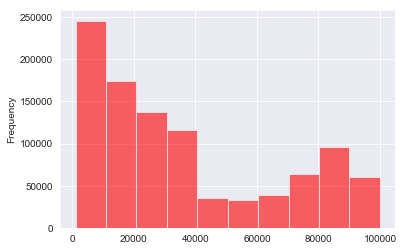

In [87]:
hist(geolocation,"geolocation_zip_code_prefix")

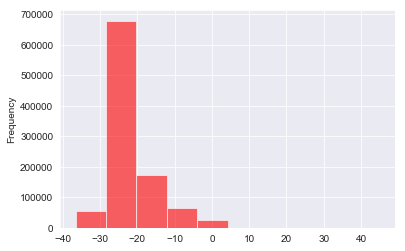

In [88]:
hist(geolocation,"geolocation_lat")

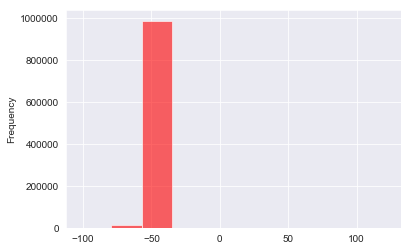

In [89]:
hist(geolocation,"geolocation_lng")

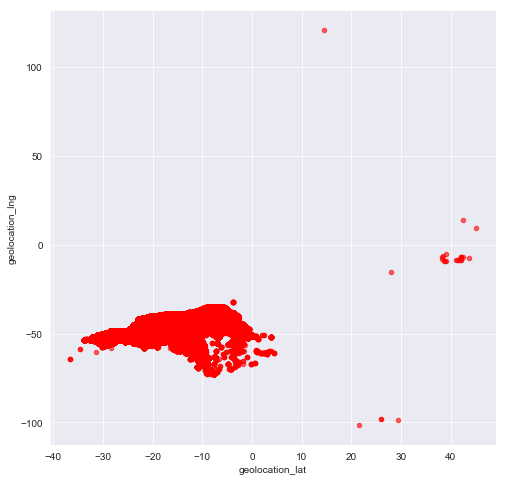

In [90]:
geolocation.plot(x = "geolocation_lat", y = "geolocation_lng",
                 kind = "scatter", color = "red",
                 alpha = 0.6, figsize = (8,8))

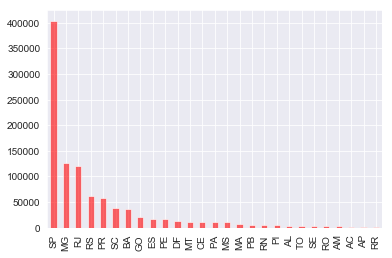

In [91]:
plot(geolocation,"geolocation_state","bar")